# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load, parse_dates=['date'])

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides= pyber_data_df.groupby(["type"]).count()["ride_id"]
#total_rides

In [4]:
# 2. Get the total drivers for each city type
total_drivers= pyber_data_df.groupby(["type"]).sum()["driver_count"]
#total_drivers

In [5]:
#  3. Get the total amount of fares for each city type
total_fares= pyber_data_df.groupby(["type"]).sum()["fare"]
#total_fares

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fare_ride=total_fares/total_rides
#avg_fare_ride

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_fare_driver= total_fares/total_drivers
#avg_fare_driver

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    "Total Rides": total_rides,
    "Total Drivers": total_drivers,
    "Total Fares": total_fares,
    "Average Fare per Ride": avg_fare_ride,
    "Average Fare per Driver": avg_fare_driver
})

In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
pyber_summary_df["Total Fares"]= pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"]= pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"]= pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,8570,"$19,356.33",$30.97,$2.26
Urban,1625,59602,"$39,854.38",$24.53,$0.67


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
by_type_n_date_df=pyber_data_df[['type','fare','date']].copy()

In [13]:
by_type_n_date_df = pd.DataFrame(by_type_n_date_df.groupby(['date','type']).sum()[['fare']])
by_type_n_date_df

,,fare
date,type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:49,Urban,18.45
2019-05-08 07:29:01,Urban,18.55


In [14]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
by_type_n_date_df= by_type_n_date_df.reset_index()

In [15]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
by_type_n_date_df= pd.pivot_table(by_type_n_date_df, index= "date", columns=['type'], values='fare')
#by_type_n_date_df

In [16]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fix_date_df= by_type_n_date_df.loc['2019-01-01':'2019-04-29']

In [17]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
by_type_n_date_df.index = pd.to_datetime(by_type_n_date_df.index)

In [18]:
# 7. Check that the datatype for the index is datetime using df.info()
by_type_n_date_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 154.2 KB


In [19]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_df=fix_date_df.resample("W").sum()

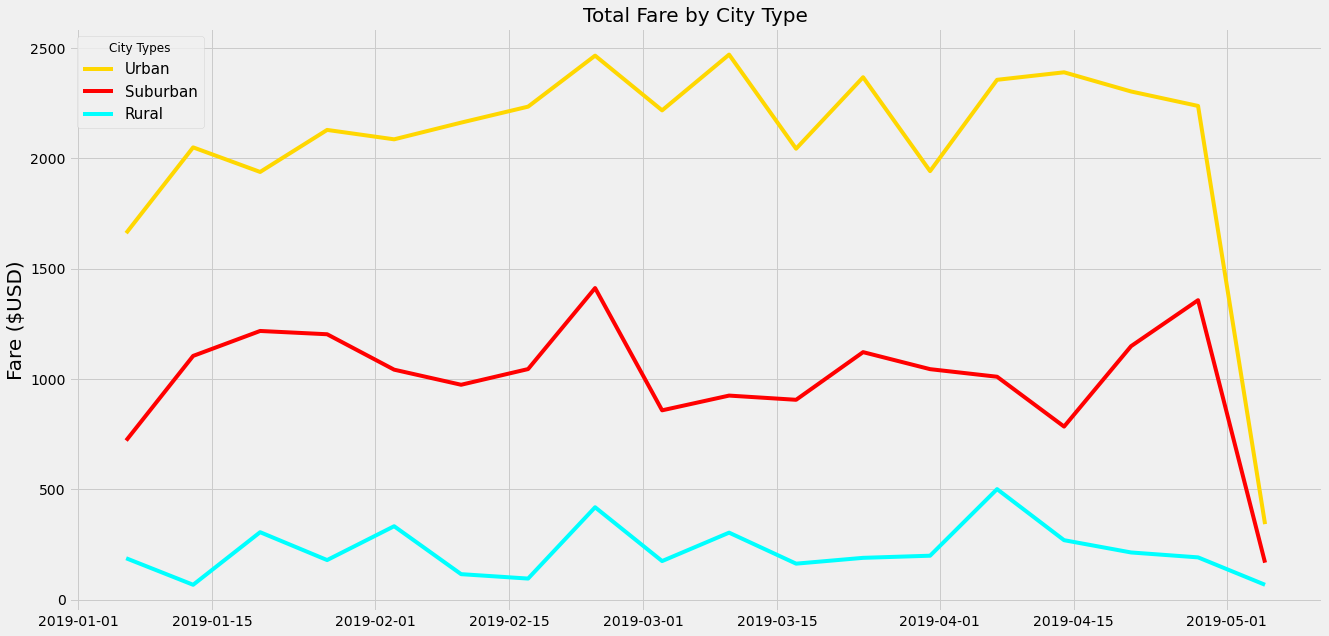

In [22]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(20,10))

x_values= weekly_df.reset_index()["date"]
ax.plot(x_values, weekly_df["Urban"], c= "gold", label= "Urban")
ax.plot(x_values, weekly_df["Suburban"], c= "red", label= "Suburban")
ax.plot(x_values, weekly_df["Rural"], c= "cyan", label="Rural")

x_mon= ["Jan", "Feb", "Mar", "Apr", "May"]
#incorporate the graph properties
ax.set_title("Total Fare by City Type", fontsize="20")
ax.set_xlabel= ("x_mon")
ax.set_ylabel("Fare ($USD)", fontsize="20")
ax.grid=True

lgnd = plt.legend(fontsize="15", mode="Expanded",
    loc="upper left", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.savefig("analysis/PyBer_fare_summary.png")

plt.show()

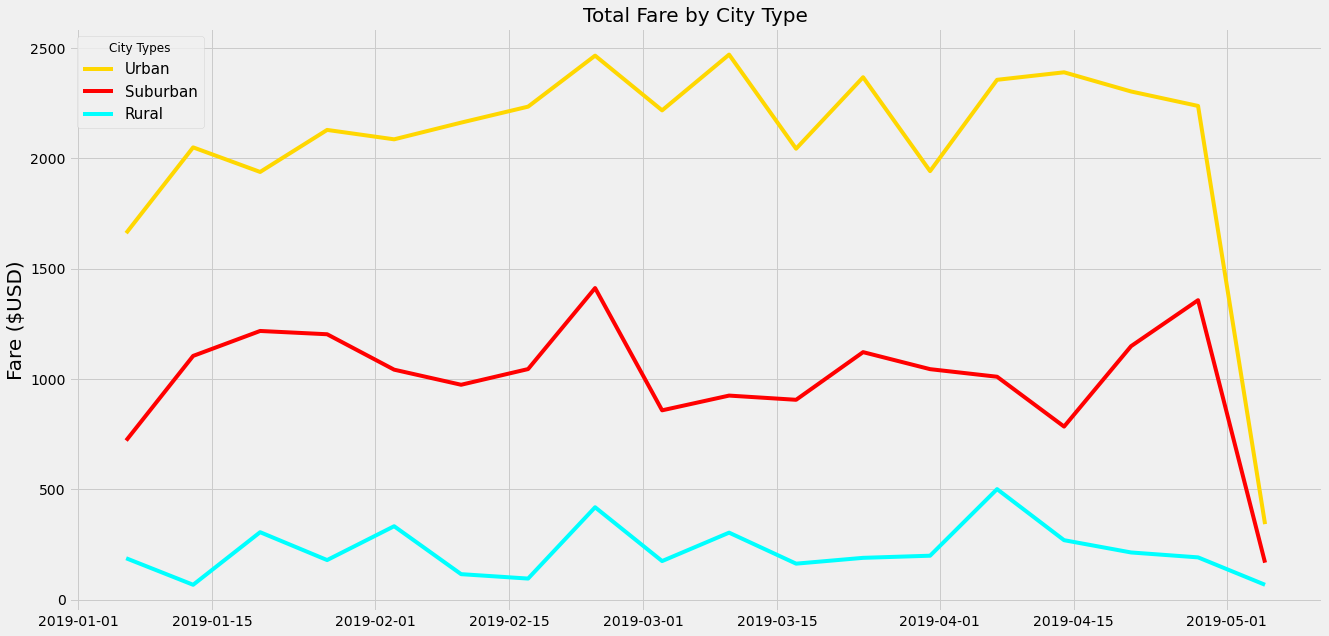

In [23]:
x_values= weekly_df.reset_index()["date"]

plt.figure(figsize=(20,10))

plt.plot(x_values, weekly_df["Urban"], c= "gold", label= "Urban")
plt.plot(x_values, weekly_df["Suburban"], c= "red", label= "Suburban")
plt.plot(x_values, weekly_df["Rural"], c= "cyan", label="Rural")

x_mon= ["Jan", "Feb", "Mar", "Apr", "May"]
#incorporate the graph properties
plt.title("Total Fare by City Type", fontsize="20")
plt.xlabel= ('x_mon')
plt.ylabel("Fare ($USD)", fontsize="20")
plt.grid(True)

lgnd = plt.legend(fontsize="15", mode="Expanded",
    loc="upper left", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.savefig('analysis/PyBer_fare_summary.png')

plt.show()